<a href="https://colab.research.google.com/github/suraj3004200/EDA/blob/main/EDA_capstone_project_By_Suraj_singh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>   # **PLAYSTORE APP REVIEW ANALYSIS**




##**This google play store database is a database with the data of multiple apps with their names ,categories,Reviews, Ratings, Installs and multiple other features We are going to use this data to analyze and find useful insights  out of it**:

## **The Analysis points are :**
1. Collecting the data and importing it
2. Overviewing the data
3. Dividing the data and finding the most popular category
4. Finding the Top 10 highest rated apps in the playstore
5. Looking for the percentage difference of people's priority of free apps over paid apps
6. Reviewing the game category and finding teh most reviwed and highest rated game of playstore
7. At last finding the most popular genre of apps in playstore
8. Conclusion

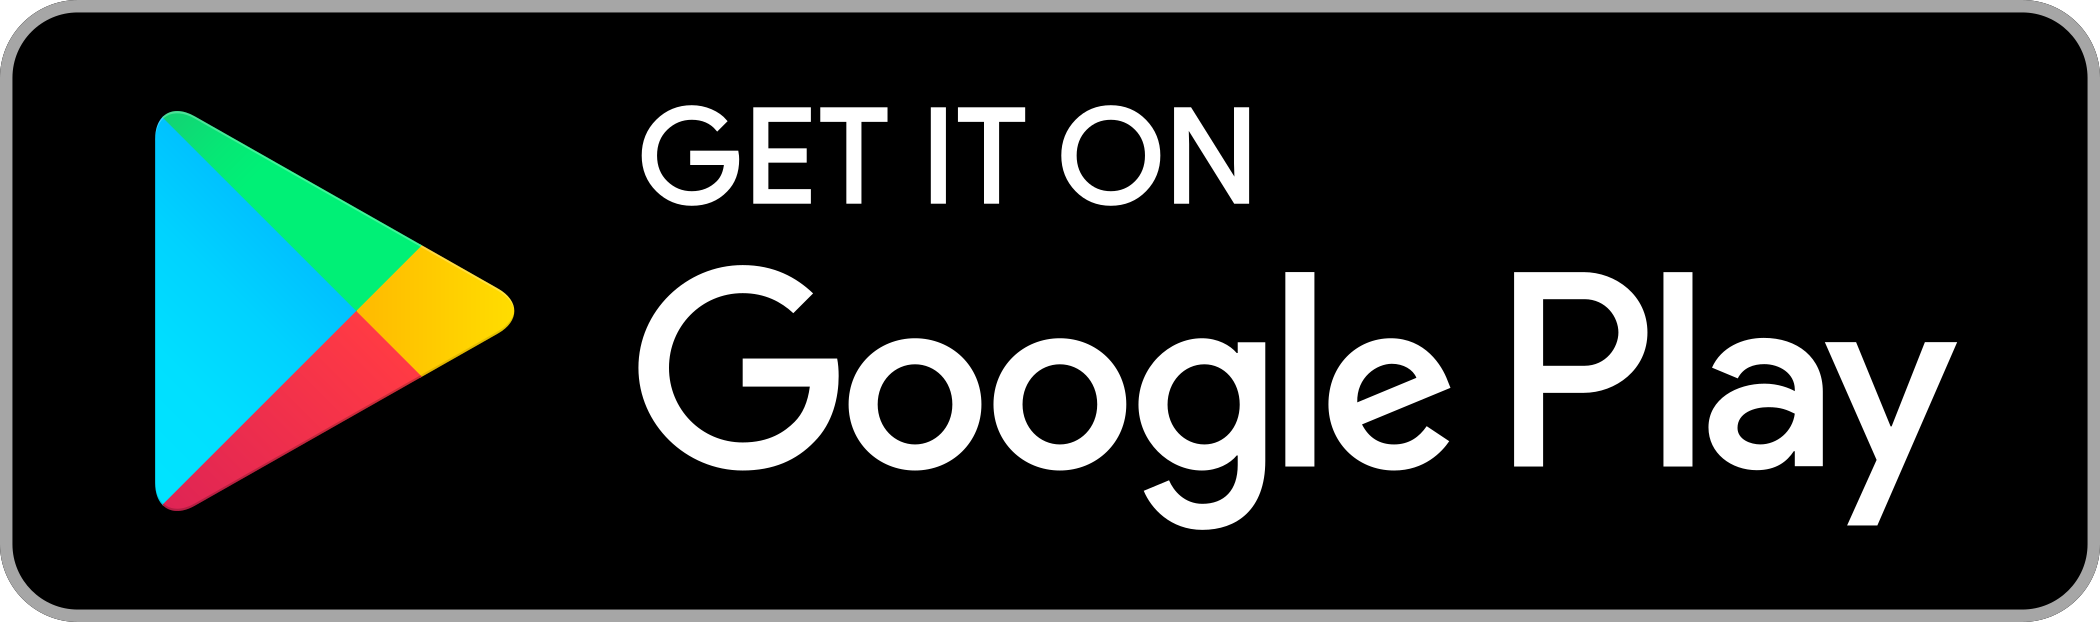

# **1. Collecting the data and Importing it :**

### **Importing Required libararies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Pregrad/Play Store Data.csv'

In [ ]:
play_review = pd.read_csv(file_path,encoding="ISO-8859-1")
play_review.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# **2. Overviewing the data**

In [ ]:
# Checking the shape of the dataset
play_review.shape

(10841, 13)

In [ ]:
# Checking the columns of dataset
play_review.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
# Checking info of dataset
play_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# **3. Dividing the data and finding the most popular category**

<Axes: title={'center': 'Total apps in each category'}, xlabel='Category', ylabel='No. of apps'>

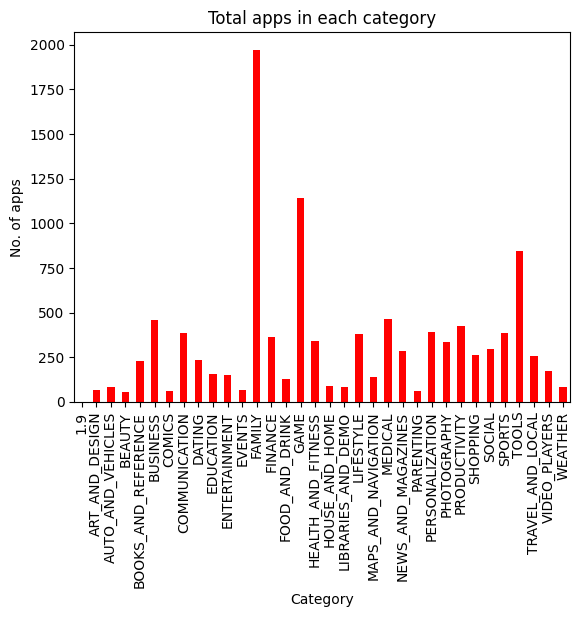

In [ ]:
#Making a grouped datframe of teh categories with their app count
grp_categories = play_review.groupby(by = ["Category"])["App"].count()

#Plotting the bar graph of the grouped datframe
grp_categories.plot(kind = "bar", ylabel = "No. of apps",title = "Total apps in each category", color = "red")

**So in the above bar plot we can clearly see that the most no. of Apps present in this dataset are of Family category and the second most are of game category so these are the popular categories among the android apps**

# **4. Finding the Top 10 highest rated apps in the playstore**

In [ ]:
#lets see the top 10 highest rated apps on playstore with rating of more than 4.5
high_rated_app = play_review[play_review['Rating'] > 4.5]['App'][:10].tolist()
high_rated_rating = play_review[play_review['Rating'] > 4.5]['Rating'][:10].tolist()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


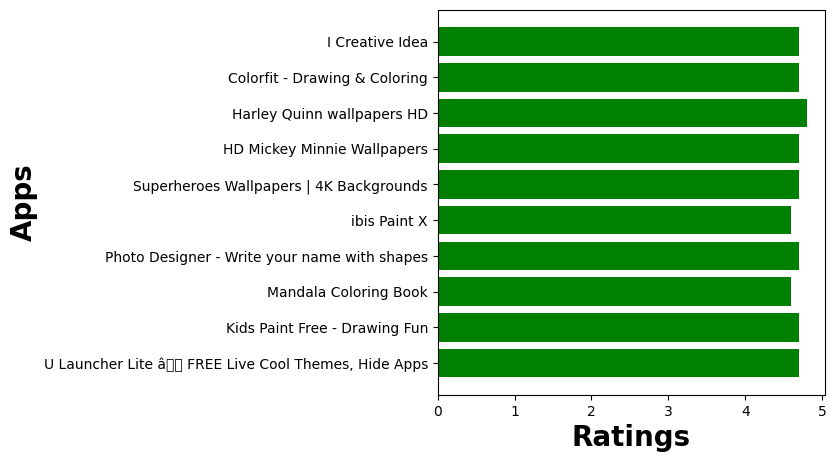

In [ ]:
#Plotting the graph of Top 10 highest rated Apps
fig = plt.figure(figsize = (5,5))
plt.barh(high_rated_app,high_rated_rating, color = "green")
plt.xlabel("Ratings",fontweight = "bold", fontsize = 20)
plt.ylabel("Apps",fontweight = "bold", fontsize = 20)
plt.show()

### **So from the above plot we can coclude that the top rated apps are mostly the apps that are used for personal device customizations so people tend to customize their devices in their own way . It can also be concluded that these apps have minimum bugs and errors and their customer support is good too**

# **5. Looking for the percentage difference of people's priority of free apps over paid apps**

In [ ]:
# Now lets lookout for the paid apps

# Filtering rows based on the condition and selecting only desired columns
paid_apps = play_review.loc[play_review['Type'] != 'Free', ['App', 'Rating', 'Reviews', 'Installs']].copy()

# Resetting the index
paid_apps.reset_index(drop=True, inplace=True)


In [ ]:
#checking all the paid apps
paid_apps

,App,Rating,Reviews,Installs
0,TurboScan: scan documents and receipts in PDF,4.7,11442,"100,000+"
1,Tiny Scanner Pro: PDF Doc Scan,4.8,10295,"100,000+"
2,TurboScan: scan documents and receipts in PDF,4.7,11442,"100,000+"
3,Tiny Scanner Pro: PDF Doc Scan,4.8,10295,"100,000+"
4,Puffin Browser Pro,4.0,18247,"100,000+"
...,...,...,...,...
797,FP VoiceBot,NaN,17,100+
798,Fast Tract Diet,4.4,35,"1,000+"
799,Trine 2: Complete Story,3.8,252,"10,000+"
800,"sugar, sugar",4.2,1405,"10,000+"


### **So we are having a total of 802 Paid apps in this playstore review dataset out of 10841 apps  So most poeple does not go with paid apps of playstore as the services provided by Free apps are satisfactory But if u want some extra features u can go for the Paid apps**

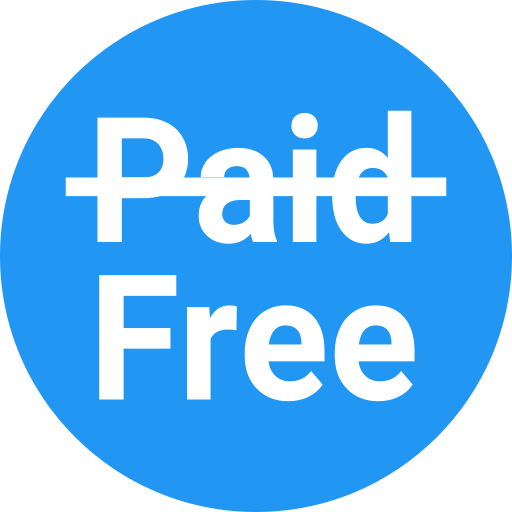

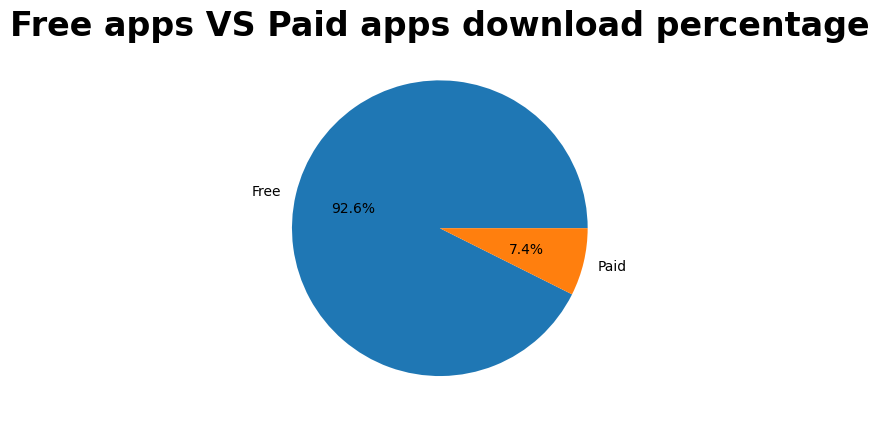

In [ ]:
# PLotting the percentage of Paid vs free apps

#First lets check if there are any empty values
play_review['Type'].isna().sum()
play_review['Type'].dropna(inplace = True)

#there is single row present with a different value in the type column so we have to remove that column
play_review = play_review.drop(play_review[play_review['Type'] == '0'].index)

#Count the No. of free and Paid apps
Value_counts = play_review['Type'].value_counts()

#Now let's plot the pie chart
plt.pie(Value_counts, labels=["Free","Paid"], autopct='%1.1f%%')
plt.title('Free apps VS Paid apps download percentage', fontweight = 'bold', fontsize = 24)
plt.show()

# **6. Reviewing the game category and finding the most reviewed and highest rated game of playstore**

In [ ]:
#First we will take all th games in a separate datframe
games= play_review.loc[play_review['Category'] == 'GAME',['App','Rating','Reviews','Installs']]
games.reset_index(drop = True, inplace = True)

#Now we will sort the games according to reviews most reviewed as first and then so on
sorted_games = games.sort_values(by = 'Reviews',ascending = False,ignore_index = True)

#There are lots of duplicate apps data so we will remove them first
sorted_games.drop_duplicates('App',ignore_index = True, inplace = True)

#Now we will remove the games with 0 reviews and NAN ratings as they are not of any help in the further process

sorted_games.dropna(inplace = True)

sorted_games.reset_index(drop = True, inplace = True)

#Converting the reviews columns from str to int datatype
sorted_games['Reviews'] = sorted_games['Reviews'].astype(int)

#Now take out the most reviewed games more than 10000000 reviews
Top_games_rev = sorted_games.loc[sorted_games['Reviews'] > 10000000]
Top_games_rev.reset_index(drop = True, inplace = True)

#Also the games with a rating of more than 4.8
Top_games_rat = sorted_games.loc[sorted_games['Rating'] > 4.8]
Top_games_rat.reset_index(drop = True, inplace = True)


[Text(0.5, 0, 'Ratings'),
 Text(0, 0.5, 'Games'),
 Text(0.5, 1.0, 'Highest rated games of playstore')]

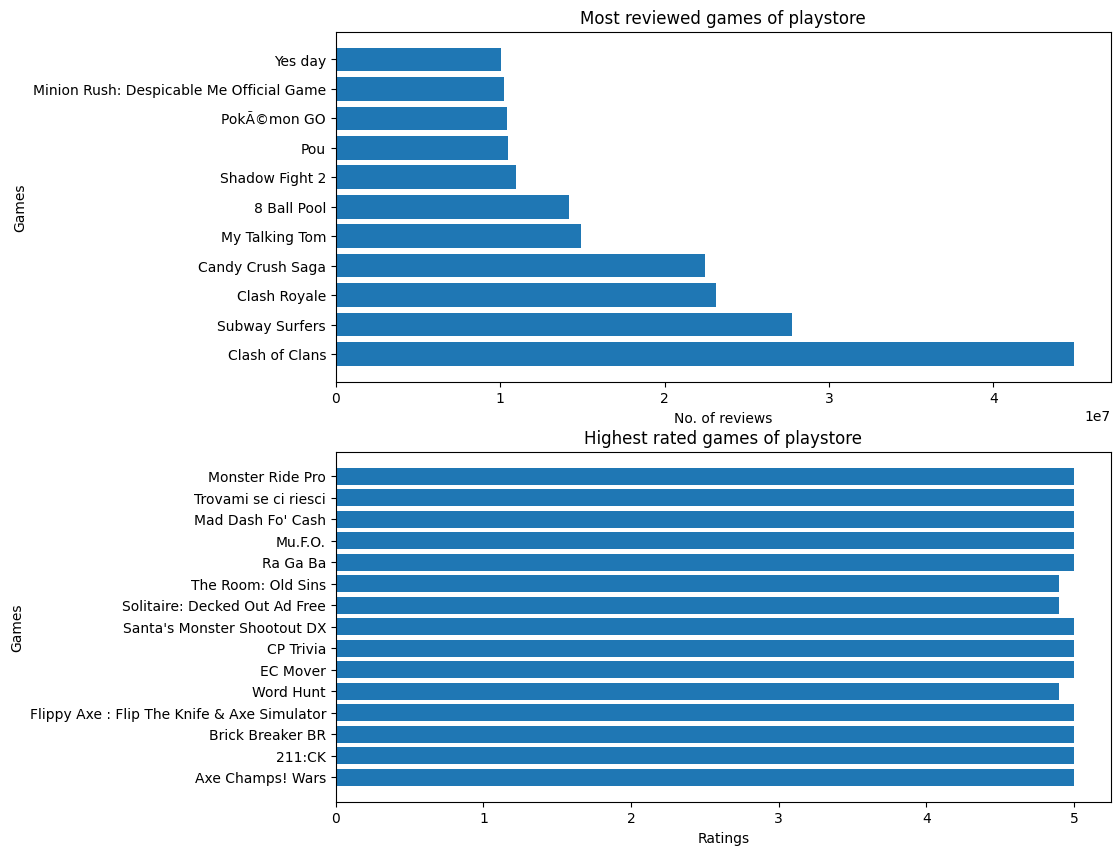

In [ ]:
#Plotting the bar graphs for each of the games dataframe

#Top reviwed games bar graph

fig, (ax1,ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (10,10))
ax1.barh(Top_games_rev['App'],Top_games_rev['Reviews'])
ax1.set(xlabel = "No. of reviews", ylabel = 'Games', title = 'Most reviewed games of playstore')

#Top rated games bar graph

ax2.barh(Top_games_rat['App'],Top_games_rat['Rating'])
ax2.set(xlabel = "Ratings", ylabel = 'Games', title = 'Highest rated games of playstore')

# **So the most reviwed game in playstore is clash of clans**

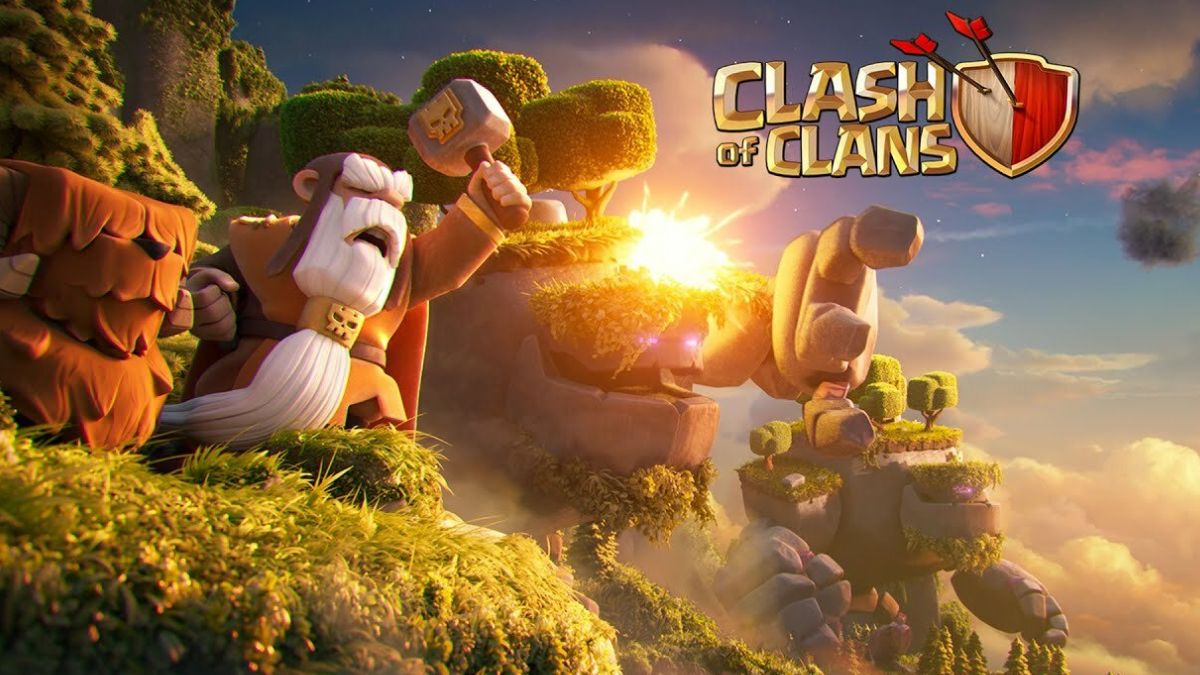

# **And the Highest rated game is Monster ride pro**

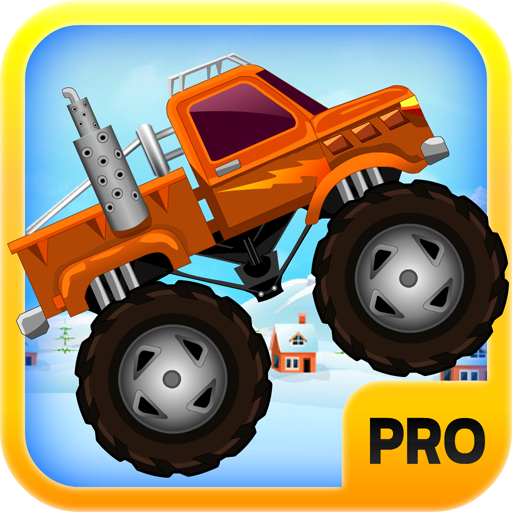

# **7. Finding the most popular genre of apps in playstore**

In [ ]:
#Finding the value counts of each genre
genre_count = play_review['Genres'].value_counts()
genre_count.head()

Tools            842
Entertainment    623
Education        549
Medical          463
Business         460
Name: Genres, dtype: int64

### **From the above output we can clearly see that the most popular App genre in playstore is "Tools" and Top 5 popular genre are Tools, Entertainment, Education, Medical, Business among the people**

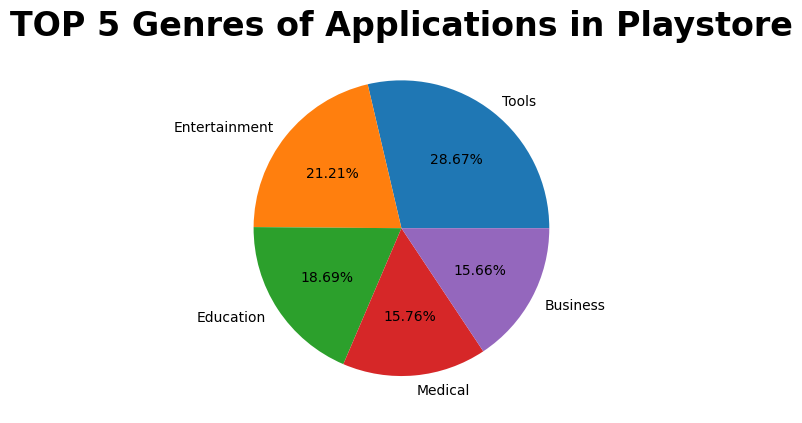

In [ ]:
#Plotting the pie chart of top 5 genres of Applications
Top_genre = genre_count.head()
plt.pie(Top_genre,labels = Top_genre.index,autopct = '%1.2f%%')
plt.title("TOP 5 Genres of Applications in Playstore", fontweight = 'bold', fontsize =24)
plt.show()

# **8. Conclusion**
We have finished our data analysis on the playstore dataset having 13 features in total and we utilised atleast 6 of these features to find some useful insights out of the data so the insights that we found are:



*   The Most popular app category was **family** so people tend to download the apps which are in this category .Also this category had a very good **high rating** app percentage which means Users like these type of apps

*   We also found that the highest rated apps are of **mobile device customization**.So we can say that these apps have a very good **UI** with a good customer support

*   We also found that Users prioritize **Free apps** More than the **Paid apps** as those apps give u less but enough features to satisfy the user's needs
*   After the analysis of data we also found that if the content of the app is availalble for **every age group** so that apps are more prioritized


*   We found that the Most reviewed game of playstore was **Clash of clans** and there were many 5 star games in the playstore one of them was **Monster ride Pro**


*   We also Found the Most popular genre of playstore is **Tools** and the top 5 app genres are **Tools,Entertainment,Education,Medical and Business**

### **So the conclusion is that apps that are of family category and free of cost with good user interface and customer support are more preferred by the users and also rated good so that other users also install that specific app and it will more preferred if that app is of Tools or Entertainment genre**
